In [1]:
import pandas as pd
import numpy as np
import sklearn 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("cricket_legends.csv")

In [3]:
df1.head()

,folder_name,filename
0,adam_gilchrist,0089e58895.jpg
1,adam_gilchrist,00a53b4482.jpg
2,adam_gilchrist,00abc353f4.jpg
3,adam_gilchrist,02007f2216.jpg
4,adam_gilchrist,038144ecd5.jpg


In [4]:
img = cv2.imread("./test_images/R.jpg")

In [5]:
img.shape


(1125, 900, 3)

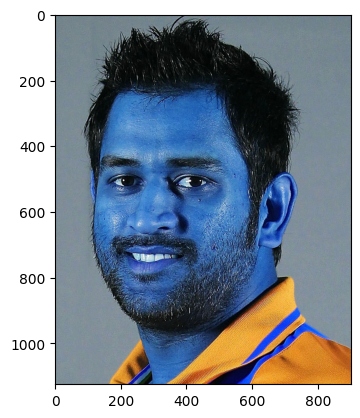

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1125, 900)

In [8]:
gray

array([[130, 137, 131, ..., 133, 133, 133],
       [133, 138, 133, ..., 128, 131, 133],
       [136, 137, 133, ..., 126, 127, 129],
       ...,
       [144, 146, 145, ..., 122, 121, 121],
       [144, 146, 146, ..., 112, 111, 121],
       [144, 147, 147, ..., 120, 119, 130]], dtype=uint8)

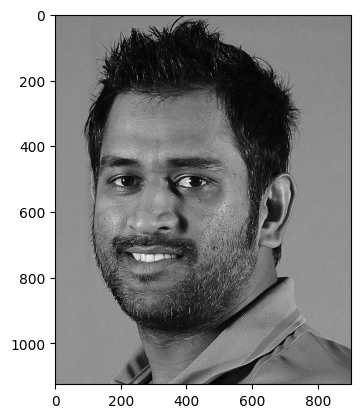

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 42, 259, 601, 601]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(42, 259, 601, 601)

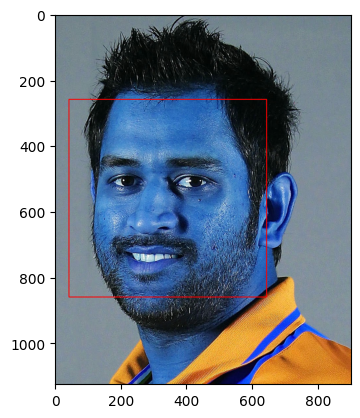

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

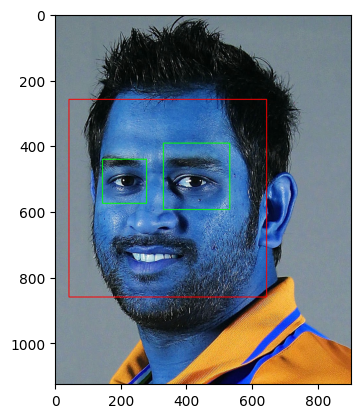

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

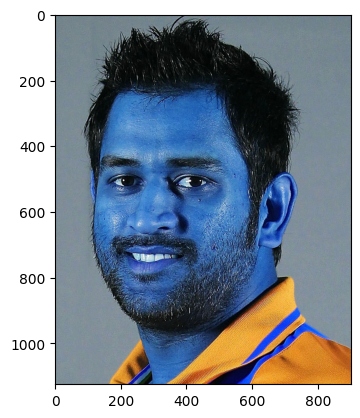

In [15]:
original_image = cv2.imread("./test_images/R.jpg")
plt.imshow(original_image)

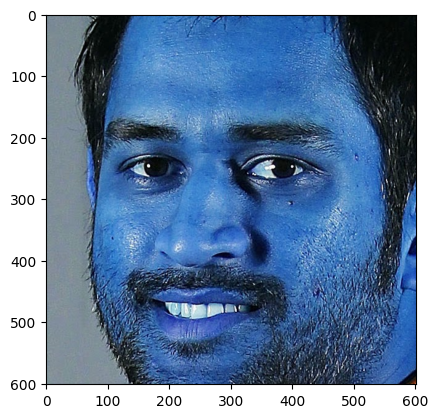

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/R.jpg')
plt.imshow(cropped_image)

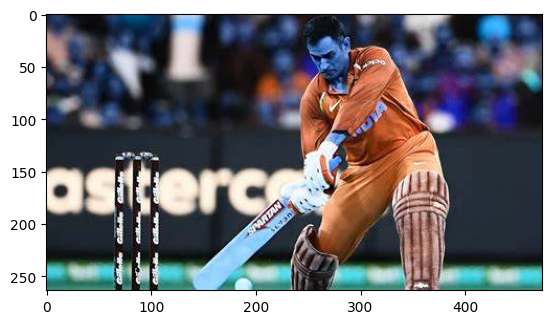

In [17]:
original_image = cv2.imread("./test_images/OIP.jpg")
plt.imshow(original_image)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/OIP.jpg')
cropped_image_no_2_eyes

In [19]:
path_to_data = "./Cricket Legends/"
path_to_cr_data = "./Cricket Legends/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./Cricket Legends/adam_gilchrist',
 './Cricket Legends/alastair_cook',
 './Cricket Legends/allan_donald',
 './Cricket Legends/brian_lara',
 './Cricket Legends/chris_gayle',
 './Cricket Legends/curtly_ambrose',
 './Cricket Legends/dale_steyn',
 './Cricket Legends/don_bradman',
 './Cricket Legends/garfield_sobers',
 './Cricket Legends/glenn_mcgrath',
 './Cricket Legends/ian_botham',
 './Cricket Legends/imran_khan',
 './Cricket Legends/james_anderson',
 './Cricket Legends/jaques_kallis',
 './Cricket Legends/kapil_dev',
 './Cricket Legends/kumar_sangakkara',
 './Cricket Legends/mahela_jayawardene',
 './Cricket Legends/ms_dhoni',
 './Cricket Legends/muttiah_muralitharan',
 './Cricket Legends/rahul_dravid',
 './Cricket Legends/richard_hadlee',
 './Cricket Legends/ricky_ponting',
 './Cricket Legends/sachin_tendulkar',
 './Cricket Legends/shane_warne',
 './Cricket Legends/shoaib_akhtar',
 './Cricket Legends/steve_waugh',
 './Cricket Legends/sunil_gavaskar',
 './Cricket Legends/virat_kohli',


In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
legends_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    legends_name = img_dir.split('/')[-1]
    print(legends_name)
    
    legends_file_names_dict[legends_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + legends_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = legends_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            legends_file_names_dict[legends_name].append(cropped_file_path)
            count += 1    

adam_gilchrist
Generating cropped images in folder:  ./Cricket Legends/cropped/adam_gilchrist
alastair_cook
Generating cropped images in folder:  ./Cricket Legends/cropped/alastair_cook
allan_donald
Generating cropped images in folder:  ./Cricket Legends/cropped/allan_donald
brian_lara
Generating cropped images in folder:  ./Cricket Legends/cropped/brian_lara
chris_gayle
Generating cropped images in folder:  ./Cricket Legends/cropped/chris_gayle
curtly_ambrose
Generating cropped images in folder:  ./Cricket Legends/cropped/curtly_ambrose
dale_steyn
Generating cropped images in folder:  ./Cricket Legends/cropped/dale_steyn
don_bradman
Generating cropped images in folder:  ./Cricket Legends/cropped/don_bradman
garfield_sobers
Generating cropped images in folder:  ./Cricket Legends/cropped/garfield_sobers
glenn_mcgrath
Generating cropped images in folder:  ./Cricket Legends/cropped/glenn_mcgrath
ian_botham
Generating cropped images in folder:  ./Cricket Legends/cropped/ian_botham
imran_kh

In [27]:
legends_file_names_dict = {}
for img_dir in cropped_image_dirs:
    legends_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    legends_file_names_dict[legends_name] = file_list
legends_file_names_dict

{'adam_gilchrist': ['./Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist1.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist10.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist11.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist13.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist2.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist3.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist4.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist5.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist6.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist7.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist8.png',
  './Cricket Legends/cropped/adam_gilchrist\\adam_gilchrist9.png'],
 'alastair_cook': ['./Cricket Legends/cropped/alastair_cook\\alastair_cook10.png',
  './Cricket Legends/cropped/alastair_cook\\alastair_cook11.png',
  './Cricket Legends/crop

In [28]:
class_dict = {}
count = 0
for legends_name in legends_file_names_dict.keys():
    class_dict[legends_name] = count
    count = count + 1
class_dict

{'adam_gilchrist': 0,
 'alastair_cook': 1,
 'allan_donald': 2,
 'brian_lara': 3,
 'chris_gayle': 4,
 'curtly_ambrose': 5,
 'dale_steyn': 6,
 'don_bradman': 7,
 'garfield_sobers': 8,
 'glenn_mcgrath': 9,
 'ian_botham': 10,
 'imran_khan': 11,
 'james_anderson': 12,
 'jaques_kallis': 13,
 'kapil_dev': 14,
 'kumar_sangakkara': 15,
 'mahela_jayawardene': 16,
 'ms_dhoni': 17,
 'muttiah_muralitharan': 18,
 'rahul_dravid': 19,
 'richard_hadlee': 20,
 'ricky_ponting': 21,
 'sachin_tendulkar': 22,
 'shane_warne': 23,
 'shoaib_akhtar': 24,
 'steve_waugh': 25,
 'sunil_gavaskar': 26,
 'virat_kohli': 27,
 'viv_richards': 28,
 'wasim_akram': 29}

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [30]:
X, y = [], []
for legends_name, training_files in legends_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[legends_name])   

In [31]:
len(X)

1028

In [32]:
len(X[0])

4096

In [33]:
X[0]

array([[239],
       [242],
       [246],
       ...,
       [  7],
       [231],
       [ 45]], dtype=uint8)

In [34]:
y[0]

0

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1028, 4096)

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.45136186770428016

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       1.00      0.50      0.67         2
           5       1.00      0.25      0.40         4
           6       0.12      0.17      0.14         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       1.00      0.33      0.50         6
          11       0.37      0.68      0.48        19
          12       1.00      0.29      0.44         7
          13       0.14      0.43      0.21         7
          14       0.88      0.71      0.79        21
          15       0.42      0.36      0.38        14
          16       0.43      0.43      0.43        14
          17       0.00      0.00      0.00         8
          18       0.38    

C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.552576,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.304860,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.509753,{'logisticregression__C': 1}


In [54]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [55]:
best_estimators['svm'].score(X_test,y_test)

0.5642023346303502

In [56]:
best_estimators['random_forest'].score(X_test,y_test)

0.29961089494163423

In [57]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5447470817120622

In [59]:
best_clf = best_estimators['svm']

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  

Text(95.72222222222221, 0.5, 'Truth')

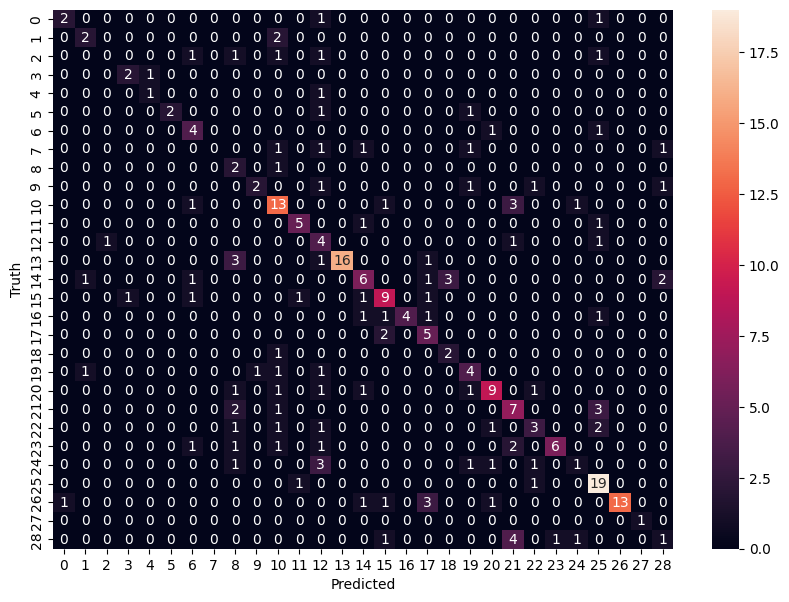

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
class_dict

{'adam_gilchrist': 0,
 'alastair_cook': 1,
 'allan_donald': 2,
 'brian_lara': 3,
 'chris_gayle': 4,
 'curtly_ambrose': 5,
 'dale_steyn': 6,
 'don_bradman': 7,
 'garfield_sobers': 8,
 'glenn_mcgrath': 9,
 'ian_botham': 10,
 'imran_khan': 11,
 'james_anderson': 12,
 'jaques_kallis': 13,
 'kapil_dev': 14,
 'kumar_sangakkara': 15,
 'mahela_jayawardene': 16,
 'ms_dhoni': 17,
 'muttiah_muralitharan': 18,
 'rahul_dravid': 19,
 'richard_hadlee': 20,
 'ricky_ponting': 21,
 'sachin_tendulkar': 22,
 'shane_warne': 23,
 'shoaib_akhtar': 24,
 'steve_waugh': 25,
 'sunil_gavaskar': 26,
 'virat_kohli': 27,
 'viv_richards': 28,
 'wasim_akram': 29}

In [63]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [64]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# Created by - Parth Panchal